In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

import os
if not os.path.exists('img/ch-7'):
    os.makedirs('img/ch-7', exist_ok=True)

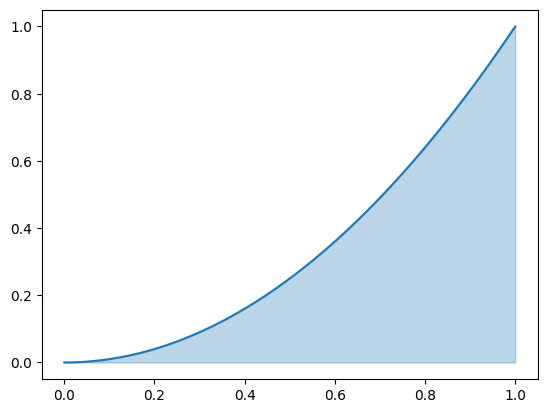

In [1]:


x = np.linspace(0, 1)
plt.plot(x, x**2)
plt.fill_between(x, 0, x**2, color='C0', alpha=0.3)
# plt.savefig('img/ch-7/7-1-1-1.png', dpi=600, bbox_inches='tight')

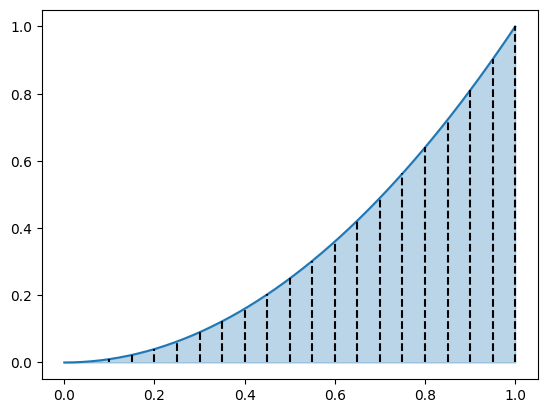

In [8]:
x = np.linspace(0, 1)
plt.plot(x, x**2)
plt.fill_between(x, 0, x**2, color='C0', alpha=0.3)

n = 20
xt = np.linspace(0, 1, n+1)
for t in xt:
    plt.plot([t, t], [0, t**2], 'k--')

# plt.savefig('img/ch-7/extra-1.png', dpi=600, bbox_inches='tight')

0.3087500000000001


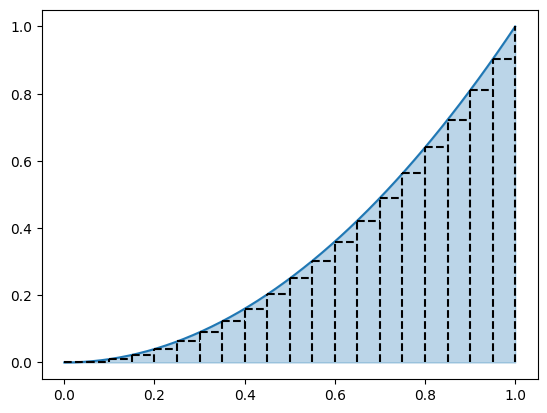

In [11]:
x = np.linspace(0, 1)
plt.plot(x, x**2)
plt.fill_between(x, 0, x**2, color='C0', alpha=0.3)

n = 20
xt, dt = np.linspace(0, 1, n+1), 1/n
for t in xt:
    plt.plot([t, t], [0, t**2], 'k--')
    if t < 1: 
        plt.plot([t, t+dt], [t**2, t**2], 'k--')

# plt.savefig('img/ch-7/7-1-1-2.png', dpi=600, bbox_inches='tight')


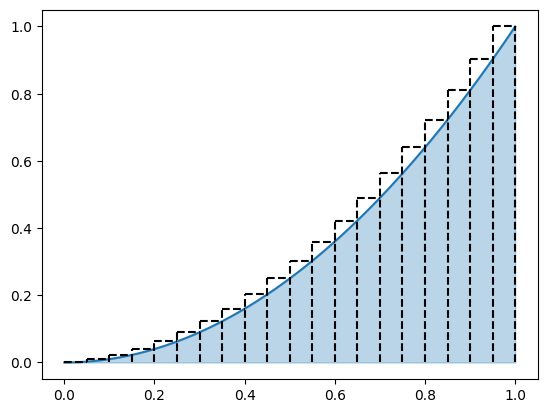

In [16]:
x = np.linspace(0, 1)
plt.plot(x, x**2)
plt.fill_between(x, 0, x**2, color='C0', alpha=0.3)

n = 20
xt, dt = np.linspace(0, 1, n+1), 1/n
for t in xt:
    if t < 1:
        plt.plot([t, t], [0, (t+dt)**2], 'k--')
    else:
        plt.plot([t, t], [0, t**2], 'k--')
    if t > 0: 
        plt.plot([t-dt, t], [t**2, t**2], 'k--')

# plt.savefig('img/ch-7/7-1-1-3.png', dpi=600, bbox_inches='tight')

In [16]:
import typing as tp

def left_sum(f: tp.Callable[[float], float], partition: np.array) -> float:
    if len(partition.shape) != 1:
        raise ValueError('partition must be 1D array')
    sum = 0
    for i in range(1, len(partition)):
        sum += f(partition[i-1]) * (partition[i] - partition[i-1])
    return sum

def right_sum(f: tp.Callable[[float], float], partition: np.array) -> float:
    if len(partition.shape) != 1:
        raise ValueError('partition must be 1D array')
    sum = 0
    for i in range(1, len(partition)):
        sum += f(partition[i]) * (partition[i] - partition[i-1])
    return sum

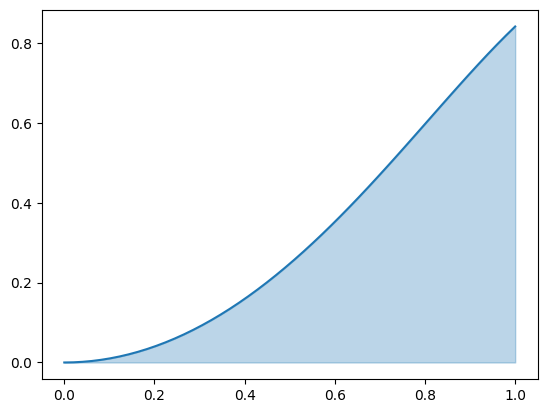

In [29]:
x = np.linspace(0, 1)
plt.plot(x, np.sin(x**2))
plt.fill_between(x, 0, np.sin(x**2), color='C0', alpha=0.3)

# plt.savefig('img/ch-7/7-1-1-4.png', dpi=600, bbox_inches='tight')


In [117]:
f = lambda x: np.sin(x**2)
eps, n = 1e-4, 1<<5
while True:
    xt = np.linspace(0, 1, n+1)
    l, r = left_sum(f, xt), right_sum(f, xt)
    if -eps < l - r < eps:
        break
    n <<= 1
print(n)
print((l+r)/2)


16384
0.31026830205884487


[0.69332613 0.14814485 0.        ]
0.6933261325977013


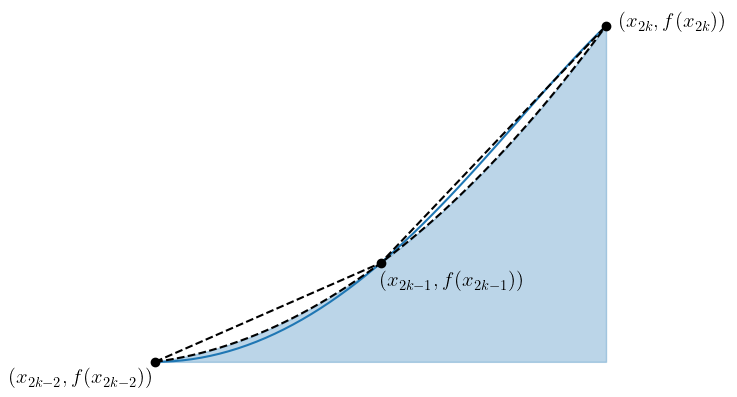

In [51]:
f = lambda x: np.sin(x**2)
a = np.array([[0, 0, 1], [1, 1, 1], [.5**2, .5, 1]])

c = np.linalg.inv(a) @ np.array([f(0), f(1), f(.5)])
print(c)
g = lambda x: c[0]*x**2 + c[1]*x + c[2]
x = np.linspace(0, 1)
plt.plot(x, f(x), 'C0')
plt.plot(x, g(x), 'k--')
plt.fill_between(x, 0, g(x), color='C0', alpha=0.3)
text_params_latex = dict(fontsize=15, usetex=True)
plt.plot([0, .5, 1], [f(0), f(.5), f(1)], 'ko')

plt.plot([0, .5, 1], [f(0), f(.5), f(1)], 'k--')
plt.text(0, f(0)-.05, r'$(x_{2k-2}, f(x_{2k-2}))$', **text_params_latex, ha='right')
plt.text(.5, f(.5**2)+.13, r'$(x_{2k-1}, f(x_{2k-1}))$', **text_params_latex)
plt.text(1+.03, f(1), r'$(x_{2k}, f(x_{2k}))$', **text_params_latex, ha='left')
# plt.figure(figsize=(5, 2))
# plt.xlim([-.8, 1.7])
# plt.ylim([-.1, .9])
plt.axis('off')
# plt.gca().set_aspect(.4)
print(2 *np.sin(1) - 4 *np.sin(1/4))
# plt.savefig('img/ch-7/extra-2.png', dpi=600, bbox_inches='tight')

In [113]:
g = lambda x: 0.693*x**2 + 0.148*x 
xt = np.linspace(0, 1, 1000)
l, r = left_sum(g, xt), right_sum(g, xt)
print((l+r)/2)

0.3050001157313471


In [111]:
(np.sin(0) + 4*np.sin(1/4) + np.sin(1))/6

0.305181136970998

In [26]:
def simpson(f: tp.Callable[[float], float], a, b: float, n: int) -> float:
    sum, h = 0, (b - a) / n
    for i in range(n):
        sum += f(a + i*h) + 4*f(a + (i + .5)*h) + f(a + (i + 1)*h)
    return sum * h / 6


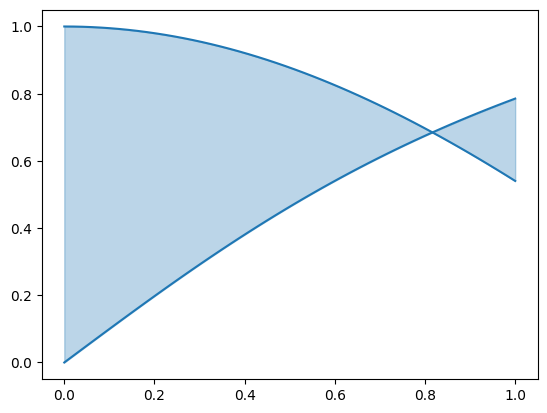

In [132]:
f1 = lambda x: np.arctan(x)
f2 = lambda x: np.cos(x)
t = np.linspace(0, 1)
plt.plot(t, f1(t), 'C0')
plt.plot(t, f2(t), 'C0')
plt.fill_between(t, f1(t), f2(t), color='C0', alpha=0.3)

# plt.savefig('img/ch-7/7-1-1-5.png', dpi=600, bbox_inches='tight')

In [137]:
t1 = np.arccos(np.pi/4)
g1 = lambda x: f2(x) - f1(x)
g2 = lambda x: f1(x) - f2(x)
simpson(g1, 0, t1, 100) + simpson(g2, t1, 1, 100)

0.4181265591993968

In [214]:
def region(p: np.array) -> bool:
    x, y = p[0], p[1]
    if not 0 <= x <= 1:
        return False
    elif not 0 <= y <= x**2:
        return False
    return True


In [163]:
sum, n = 0, 100
xx, yy = np.meshgrid(np.linspace(0, 1, n+1), np.linspace(0, 1, n+1))
for i in range(n):
    for j in range(n):
        x = np.mean([xx[i, j], xx[i+1, j+1]])
        y = np.mean([yy[i, j], yy[i+1, j+1]])
        center = np.array([x, y])
        if region(center):
            sum += 1/n**2
            
print(sum)

0.33399999999997954


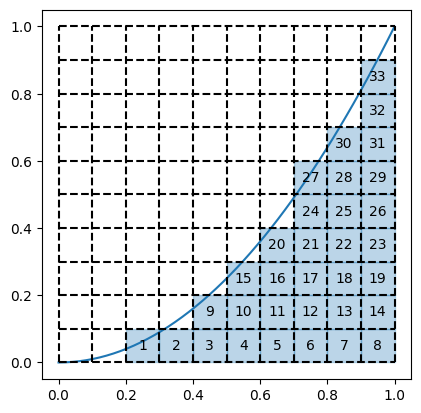

In [158]:
t = np.linspace(0, 1)
plt.plot(t, t**2)
plt.gca().set_aspect(1)
n = 10
for i in range(n+1):
    plt.plot([0, 1], [i/n, i/n], 'k--')
    plt.plot([i/n, i/n], [0, 1], 'k--')
xx, yy = np.meshgrid(np.linspace(0, 1, n+1), np.linspace(0, 1, n+1))
count = 0
for i in range(n):
    for j in range(n):
        center = np.array([np.mean([xx[i, j], xx[i+1, j+1]]), np.mean([yy[i, j], yy[i+1, j+1]])])
        if region(center):
            t = np.linspace(xx[i, j], xx[i, j] + 1/n)
            plt.fill_between(t, yy[i, j], yy[i, j]+1/n, color='C0', alpha=0.3)
            count += 1
            plt.text(center[0], center[1], str(count), ha='center', va='center')

plt.savefig('img/ch-7/extra-3.png', dpi=600, bbox_inches='tight')

In [168]:
def disc(p: np.array) -> bool:
    return np.sum(p**2) < 1

In [173]:
n, count = 100, 0
xx, yy = np.meshgrid(np.linspace(-1, 1, n+1), np.linspace(-1, 1, n+1))
for i in range(n):
    for j in range(n):
        if disc(np.array([xx[i, j], yy[i, j]])):
            count += 1
print(count/(n/2)**2)

3.13


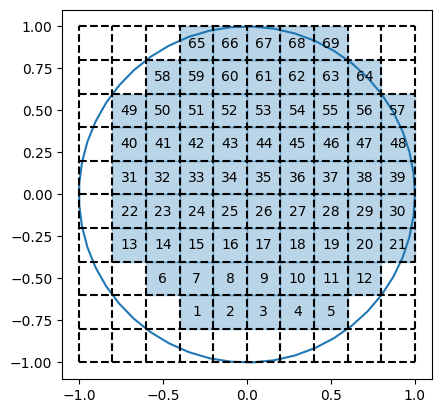

In [178]:
plt.gca().set_aspect(1)
t = np.linspace(0, 2*np.pi)
plt.plot(np.cos(t), np.sin(t))
n = 10
for i in range(n+1):
    plt.plot([-1+2/n*i, -1+2/n*i], [-1, 1], 'k--')
    plt.plot([-1, 1], [-1+2/n*i, -1+2/n*i], 'k--')
xx, yy = np.meshgrid(np.linspace(-1, 1, n+1), np.linspace(-1, 1, n+1))
count = 0
for i in range(n):
    for j in range(n):
        if disc(np.array([xx[i, j], yy[i, j]])):
            plt.fill_between([xx[i, j], xx[i, j]+2/n], yy[i, j], yy[i, j]+2/n, color='C0', alpha=0.3)
            count += 1
            plt.text(xx[i, j]+1/n, yy[i, j]+1/n, str(count), ha='center', va='center')

# plt.savefig('img/ch-7/extra-4.png', dpi=600, bbox_inches='tight')

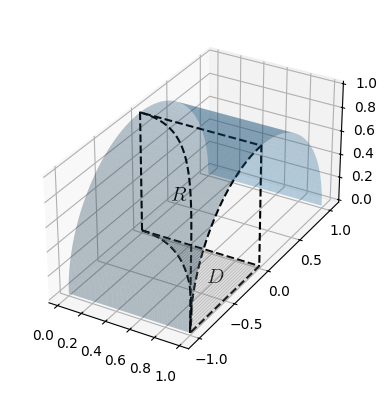

In [210]:
ax = plt.figure().add_subplot(projection='3d')
x = np.linspace(0, 1)
ax.plot(x, -x**2, 0, 'k--')
ax.plot(x, -x**2, np.sqrt(1-x**4), 'k--')

from mpl_toolkits.mplot3d.art3d import Poly3DCollection 


for i in range(len(x)-1):
    verts = [[x[i], 0, 0], [x[i], -x[i]**2, 0], [x[i+1], -x[i+1]**2, 0], [x[i+1], 0, 0]]
    ax.add_collection3d(Poly3DCollection([verts], color='gray', alpha=.2, lw=.1))

ax.plot([0, 1, 1], [0, 0, -1], [0, 0, 0], 'k--')
ax.plot([0, 0, 1, 1], [0, 0, 0, 0], [0, 1, 1, 0], 'k--')
t = np.linspace(np.pi/2, np.pi)
ax.plot(np.ones_like(t), np.cos(t), np.sin(t), 'k--')
dd, tt = np.meshgrid(np.linspace(0, 1), np.linspace(0, np.pi))
xx, yy, zz = dd, np.cos(tt), np.sin(tt)
ax.plot_surface(xx, yy, zz, alpha=0.3)

ax.set_aspect('equal')
ax.text(.8, -.3, 0, r'$D$', ha='center', va='center', **text_params_latex)
ax.text(.5, -.3, .6, r'$R$', ha='center', va='center', **text_params_latex)
# plt.savefig('img/ch-7/extra-5.png', dpi=600, bbox_inches='tight')

In [270]:
def region_2d(p: np.array) -> bool:
    x, y = p[0], p[1]
    if not 0 <= x <= 1:
        return False
    elif not -x**2 <= y <= 0:
        return False
    return True

f = lambda p: np.sqrt(1-p[1]**2)

n, sum = 500, 0
xx, yy = np.meshgrid(np.linspace(0, 1, n+1), np.linspace(-1, 0, n+1))
for i in range(n):
    for j in range(n):
        x, y = np.mean([xx[i, j], xx[i+1, j+1]]), np.mean([yy[i, j], yy[i+1, j+1]]) 
        if region_2d(np.array([x, y])):
            sum += f(center) / n**2

print(sum)


0.3329829892054998


In [265]:
def region_3d(p: np.array) -> bool:
    x, y, z = p[0], p[1], p[2]
    if not 0 <= x <= 1:
        return False
    elif not -x**2 <= y <= 0:
        return False
    elif not 0 <= z <= np.sqrt(1-y**2):
        return False
    return True

In [275]:
n = 50
x, dx = np.linspace(0, 1, n), 1/n
y, dy = np.linspace(-1, 0, n), 1/n
z, dz = np.linspace(0, 1, n), 1/n 
mesh = np.array(np.meshgrid(x, y, z))
mesh = mesh.reshape(3, n**3)
sum, max = 0, np.array([1, 0, 1], dtype=float)
for i in range(n**3):
    if np.any(mesh[:, i] == max): 
        continue
    if region_3(mesh[:, i] + .5/(n-1)*np.ones(3)):
        sum += 1
print(sum)
print(sum/(n-1)**3)

39102
0.3323615160349854


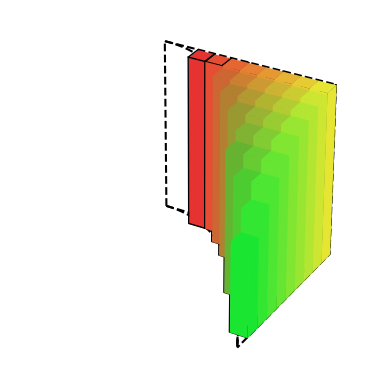

In [31]:
ax = plt.figure().add_subplot(projection='3d')
x = np.linspace(0, 1)
ax.plot(x, -x**2, 0, 'k--')
ax.plot(x, -x**2, np.sqrt(1-x**4), 'k--')

ax.plot([0, 1, 1], [0, 0, -1], [0, 0, 0], 'k--')
ax.plot([0, 0, 1, 1], [0, 0, 0, 0], [0, 1, 1, 0], 'k--')
t = np.linspace(np.pi/2, np.pi)
ax.plot(np.ones_like(t), np.cos(t), np.sin(t), 'k--')
dd, tt = np.meshgrid(np.linspace(0, 1), np.linspace(np.pi/2, np.pi))
xx, yy, zz = dd, np.cos(tt), np.sin(tt)
# ax.plot_surface(xx, yy, zz, alpha=0.3)

from mpl_toolkits.mplot3d.art3d import Poly3DCollection 
f = lambda p: np.sqrt(1-p[1]**2)
n = 10

dx, dy, dz = 1/n, 1/n, 1/n
eps = .01
def draw_rect(x, y, z, color):
    # top
    verts = [[x, y, z], [x+dx, y, z], [x+dx, y+dy, z], [x, y+dy, z]]
    ax.add_collection3d(Poly3DCollection([verts], color=color, lw=.1))
    vv = np.array(verts)
    vv = np.roll(vv, 1, axis=0)
    ax.plot(*vv.T, color='k', lw=1, zorder=6)

    #front
    verts = [[x, y, 0], [x+dx, y, 0], [x+dx, y, z], [x, y, z]]
    ax.add_collection3d(Poly3DCollection([verts], color=color, lw=.1))
    vv = np.array(verts)
    vv = np.roll(vv, 1, axis=0)
    ax.plot(*vv.T, color='k', lw=1, zorder=6)

    # side
    verts = [[x+dx, y, 0], [x+dx, y+dy, 0], [x+dx, y+dy, z], [x+dx, y, z]]
    ax.add_collection3d(Poly3DCollection([verts], color=color, lw=.1))
    vv = np.array(verts)
    vv = np.roll(vv, 1, axis=0)
    ax.plot(*vv.T, color='k', lw=1)

    
def draw_edge(x, y, z):
    verts = [[x, y, 0], [x+dx, y, 0], [x+dx, y, z], [x, y, z]]
    vv = np.array(verts)
    vv = np.roll(vv, 1, axis=0)
    ax.plot(*vv.T, color='k', lw=1, zorder=6)
    verts = [[x, y, 0], [x, y+dy, 0], [x, y+dy, z], [x, y, z]]
    vv = np.array(verts)
    vv = np.roll(vv, 1, axis=0)
    ax.plot(*vv.T, color='k', lw=1, zorder=6)
    verts = [[x, y, z], [x+dx, y, z], [x+dx, y+dy, z], [x, y+dy, z]]
    vv = np.array(verts)
    vv = np.roll(vv, 1, axis=0)
    verts = [[x+dx, y, 0], [x+dx, y+dy, 0], [x+dx, y+dy, z], [x+dx, y, z]]
    ax.plot(*vv.T, color='k', lw=1, zorder=6)

def region(p: np.array) -> bool:
    x, y = p[0], p[1]
    if not 0 <= x <= 1:
        return False
    elif not -x**2 <= y <= 1:
        return False
    return True

# xx, yy = np.meshgrid(np.linspace(0, 1, n+1), np.linspace(-1, 0, n+1))
# for i in range(n):
#     for j in range(n):
#         center = np.array([np.mean([xx[i, j], xx[i+1, j+1]]), np.mean([yy[i, j], yy[i+1, j+1]])])
#         if region(center):
#             draw_edge(xx[i, j], yy[i, j], f(center))

xx, yy = np.meshgrid(np.linspace(0, 1, n+1), np.linspace(-1, 0, n+1))
for i in range(n):
    for j in range(n):
        center = np.array([np.mean([xx[i, j], xx[i+1, j+1]]), np.mean([yy[i, j], yy[i+1, j+1]])])
        if region(center):
            color = (i/n, j/n, 50/255)
            draw_rect(xx[i, j], yy[i, j], f(center), color)



ax.set_aspect('equal')
ax.axis('off')
plt.savefig('img/ch-7/extra-6.png', dpi=600, bbox_inches='tight')

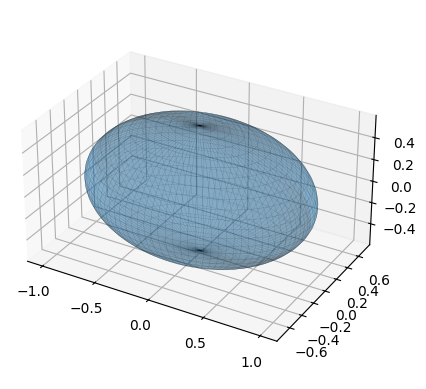

In [280]:
phi, theta = np.linspace(0, np.pi), np.linspace(0, 2*np.pi)
pp, tt = np.meshgrid(phi, theta)
xx = np.sin(tt)*np.cos(pp)
yy = np.sin(tt)*np.sin(pp)/np.sqrt(2)
zz = np.cos(tt)/np.sqrt(3)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.3, edgecolor='k', lw=.1)
ax.set_aspect('equal')

plt.savefig('img/ch-7/7-1-1-7.png', dpi=600, bbox_inches='tight')

In [283]:
def ellipse(p: np.array) -> bool:
    return p[0]**2 + 2*p[1]**2 <= 1


In [293]:
f = lambda p: 2/np.sqrt(3)*np.sqrt(1-p[0]**2 -2*p[1]**2)
intv = np.linspace(-1, 1)
grid = np.array(np.meshgrid(intv, intv)).reshape(2, -1)
sum = 0
for i in range(grid.shape[1]):
    if np.any(grid[:, i] == 1):
        continue
    center = grid[:, i] + (2/(len(intv)-1))/2*np.ones(2)
    if ellipse(center):
        sum += f(center) * (2/(len(intv)-1))**2

print(sum)



1.7102804152434623


In [294]:
def ellipsoid(p: np.array) -> bool:
    return p[0]**2 + 2*p[1]**2 + 3*p[2]**2 <= 1

intv = np.linspace(-1, 1)
mesh = np.array(np.meshgrid(intv, intv, intv)).reshape(3, -1)
sum = 0
for i in range(mesh.shape[1]):
    if np.any(mesh[:, i] == 1): continue
    if ellipsoid(mesh[:, i] + (2/(len(intv)-1))/2*np.ones(3)):
        sum += 1
        
print(sum*(2/(len(intv)-1))**3)

1.7113277630919086


In [296]:
print(np.pi * 4 / 3 / np.sqrt(6))

1.7100664402158188


[0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5]


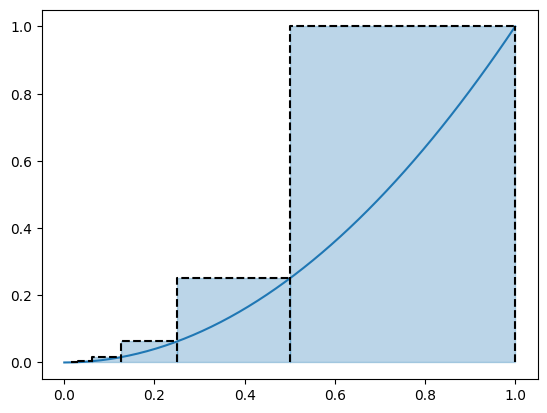

In [8]:
import numpy as np
import matplotlib.pyplot as plt

n = 6
t = []
for i in range(n):
    t.append(1/float(1<<(n-i)))
print(t)
x = np.linspace(0, 1)
plt.plot(x, x**2)
t.append(1)
for i in range(n):
    plt.plot([t[i], t[i], t[i+1]], [0, t[i+1]**2, t[i+1]**2], 'k--')
    plt.fill_between([t[i], t[i+1]], [t[i+1]**2, t[i+1]**2], color='C0', alpha=0.3)
plt.plot([1, 1], [0, 1], 'k--')

plt.savefig('img/ch-7/extra-7.png', dpi=600, bbox_inches='tight')

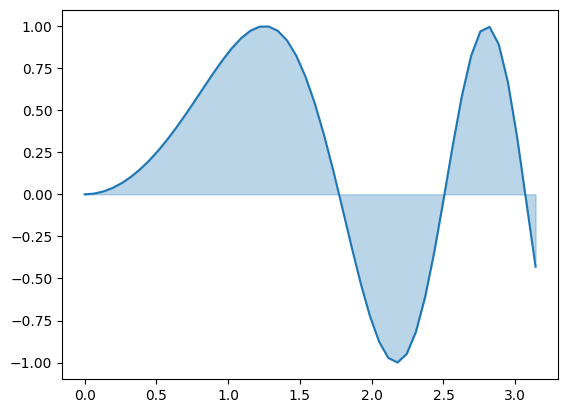

In [11]:
x = np.linspace(0, np.pi)
plt.plot(x, np.sin(x**2))
plt.fill_between(x, 0, np.sin(x**2), color='C0', alpha=0.3)

plt.savefig('img/ch-7/7-1-2-1.png', dpi=600, bbox_inches='tight')

In [18]:
f = lambda x: np.sin(x**2)
x = [0, np.sqrt(np.pi), np.sqrt(2*np.pi), np.sqrt(3*np.pi), np.pi]
area = 0
for i in range(4):
    xt = np.linspace(x[i], x[i+1], 1000)
    l = left_sum(f, xt)
    if l < 0: area -= l
    else: area += l
    print(l)
print(area)

0.8948305395699692
-0.4644233596322508
0.3578509453364745
-0.015591829773884508
1.732696674312579


In [27]:
def f(x: float) -> float:
    if x == 0: return 1
    return x * np.sin(1/x)
simpson(f, 0, 1, 1000)


0.37867490544735466

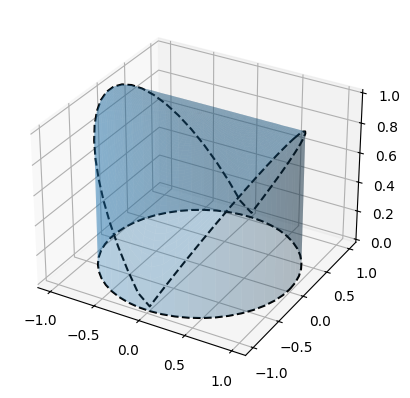

In [40]:
ax = plt.figure().add_subplot(projection='3d')
rr, tt = np.meshgrid(np.linspace(0, 1), np.linspace(0, 2*np.pi))
xx = rr*np.cos(tt)
yy = rr*np.sin(tt)
zz = np.sqrt(1-rr**2*np.sin(tt)**2)
ax.plot_surface(xx, yy, zz, color='C0', alpha=0.3)
t = np.linspace(0, 2*np.pi)
ax.plot(np.cos(t), np.sin(t), 0, 'k--')
ax.plot(np.cos(t), np.sin(t), np.sqrt(1-np.sin(t)**2), 'k--')
xx = np.vstack([np.cos(t), np.cos(t)])
yy = np.vstack([np.sin(t), np.sin(t)])
zz = np.vstack([np.zeros_like(t), np.sqrt(1-np.sin(t)**2)])
ax.plot_surface(xx, yy, zz, color='C0', alpha=0.3) 

# plt.savefig('img/ch-7/7-1-2-2.png', dpi=600, bbox_inches='tight')

In [42]:
n = 100
x = np.linspace(0, 1, n+1)
y = np.linspace(0, 1, n+1)
sum = 0
for i in range(n):
    for j in range(n):
        center = np.array([np.mean([x[i], x[i+1]]), np.mean([y[j], y[j+1]])])
        if np.sum(center**2) < 1:
            sum += np.sqrt(1-center[1]**2)/n**2
print(sum)


0.6668607877951632


In [43]:
n = 20
intv = np.linspace(-1, 1, n+1)
reg = np.array(np.meshgrid(intv, intv, intv)).reshape(3, -1)
for i in range(reg.shape[1]):
    if np.any(reg[:, i] == 1): continue
    if np.sum(reg[:, i]**2) <= 1:
        sum += np.sum(reg[:, i]**2) * (2/n)**3
print(sum)

3.1460007877951672


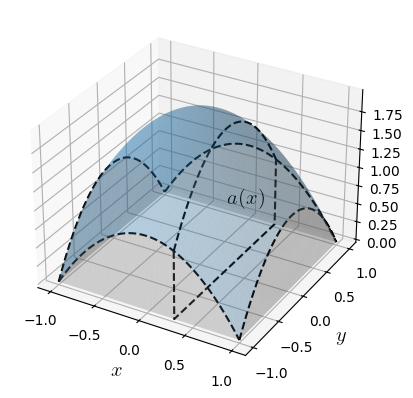

In [56]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
intv = np.linspace(-1, 1)
xx, yy = np.meshgrid(intv, intv)
zz = 2 - xx**2 - yy**2
ax.plot_surface(xx, yy, zz, alpha=0.3)

xx = np.vstack([intv, intv])
yy = np.vstack([np.ones_like(intv), np.ones_like(intv)])
zz = np.vstack([np.zeros_like(t), 1-intv**2])
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

xx = np.vstack([intv, intv])
yy = np.vstack([-np.ones_like(intv), -np.ones_like(intv)])
zz = np.vstack([np.zeros_like(t), 1-intv**2])
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

yy = np.vstack([intv, intv])
xx = np.vstack([np.ones_like(intv), np.ones_like(intv)])
zz = np.vstack([np.zeros_like(t), 1-intv**2])
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

yy = np.vstack([intv, intv])
xx = np.vstack([-np.ones_like(intv), -np.ones_like(intv)])
zz = np.vstack([np.zeros_like(t), 1-intv**2])
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

ax.plot(-np.ones_like(intv), intv, 1-intv**2, 'k--')
ax.plot(np.ones_like(intv), intv, 1-intv**2, 'k--')
ax.plot(intv, -np.ones_like(intv), 1-intv**2, 'k--')
ax.plot(intv, np.ones_like(intv), 1-intv**2, 'k--')

x0 = .3
ax.plot([x0, x0, x0, x0], [-1, -1, 1, 1], [1-x0**2, 0,0, 1-x0**2], 'k--')
ax.plot(x0*np.ones_like(intv), intv, 2-x0**2-intv**2, 'k--')
ax.text(x0, 0, 1-x0**2, r'$a(x)$', **text_params_latex)

ax.set_xlabel(r'$x$', **text_params_latex)
ax.set_ylabel(r'$y$', **text_params_latex)
plt.savefig('img/ch-7/7-2-1-1.png', dpi=600, bbox_inches='tight')

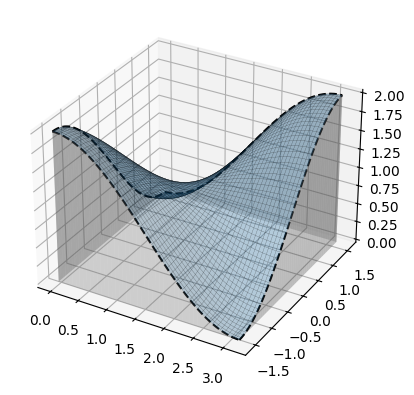

In [72]:
ax = plt.figure().add_subplot(projection='3d')
xintv, yintv = np.linspace(0, np.pi), np.linspace(-np.pi/2, np.pi/2)
xx, yy = np.meshgrid(xintv, yintv)
zz = 1 - np.cos(xx)*np.sin(yy)
ax.plot_surface(xx, yy, zz, alpha=0.3, edgecolor='k', lw=.2)

for x in [0, np.pi]:
    xx = np.vstack([x*np.ones_like(yintv), x*np.ones_like(yintv)])
    yy = np.vstack([yintv, yintv])
    zz = np.vstack([np.zeros_like(yintv), 1 - np.cos(x)*np.sin(yintv)])
    ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')
    ax.plot(x*np.ones_like(yintv), yintv, 1 - np.cos(x)*np.sin(yintv), 'k--')

for y in [-np.pi/2, np.pi/2]:    
    xx = np.vstack([xintv, xintv])
    yy = np.vstack([y*np.ones_like(xintv), y*np.ones_like(xintv)])
    zz = np.vstack([np.zeros_like(xintv), 1 - np.cos(xintv)*np.sin(y)])
    ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')
    ax.plot(xintv, y*np.ones_like(xintv), 1 - np.cos(xintv)*np.sin(y), 'k--')

plt.savefig('img/ch-7/7-2-1-2.png', dpi=600, bbox_inches='tight')

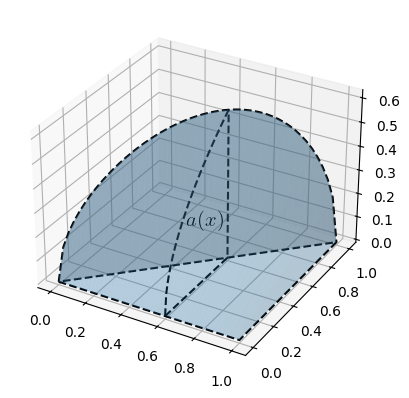

In [108]:
f = lambda x, y: np.sqrt(y*(1-x**2))
ax = plt.figure().add_subplot(projection='3d')
intv = np.linspace(0, 1)
xx = np.vstack([intv, intv])
yy = np.vstack([np.zeros_like(intv), intv])
zz = np.vstack([np.zeros_like(intv), f(intv, intv)])
ax.plot_surface(xx, yy, zz, alpha=0.3)

xx = np.vstack([intv, intv])
yy = np.vstack([intv, intv])
zz = np.vstack([np.zeros_like(intv), f(intv, intv)])
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.3)

ax.plot(intv, intv, f(intv, intv), 'k--')

x0 =.6
ax.plot([0, 1, 1, 0], [0, 0, 1, 0], [0, 0, 0, 0], 'k--')
ax.plot([x0, x0, x0], [0, x0, x0], [0, 0, f(x0, x0)], 'k--')
t = np.linspace(0, x0)
ax.plot(x0*np.ones_like(t), t, f(x0, t), 'k--')
ax.text(x0, .2, .3, r'$a(x)$', **text_params_latex)

plt.savefig('img/ch-7/7-2-1-3.png', dpi=600, bbox_inches='tight')

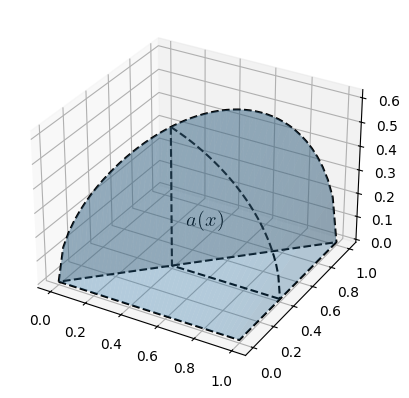

In [112]:

f = lambda x, y: np.sqrt(y*(1-x**2))
ax = plt.figure().add_subplot(projection='3d')
intv = np.linspace(0, 1)
xx = np.vstack([intv, intv])
yy = np.vstack([np.zeros_like(intv), intv])
zz = np.vstack([np.zeros_like(intv), f(intv, intv)])
ax.plot_surface(xx, yy, zz, alpha=0.3)

xx = np.vstack([intv, intv])
yy = np.vstack([intv, intv])
zz = np.vstack([np.zeros_like(intv), f(intv, intv)])
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.3)

ax.plot(intv, intv, f(intv, intv), 'k--')

y0 =.4
ax.plot([0, 1, 1, 0], [0, 0, 1, 0], [0, 0, 0, 0], 'k--')
ax.plot([y0, y0, 1], [y0, y0, y0], [f(y0, y0), 0, 0], 'k--')
t = np.linspace(y0, 1)
ax.plot(t, y0*np.ones_like(t), f(t, y0), 'k--')
ax.text(x0, .2, .3, r'$a(x)$', **text_params_latex)


plt.savefig('img/ch-7/7-2-1-4.png', dpi=600, bbox_inches='tight')

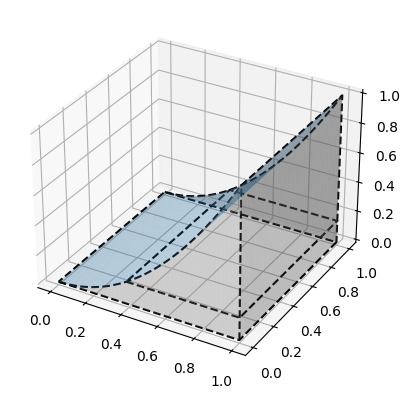

In [130]:
xintv, yintv = np.linspace(0, 1), np.linspace(0, 1)
xx, yy = np.meshgrid(xintv, yintv)
zz = xx**2

ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.3)

xx = np.vstack([np.ones_like(xintv), np.ones_like(xintv)])
yy = np.vstack([yintv, yintv])
zz = np.vstack([np.zeros_like(xintv), np.ones_like(xintv)**2])
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

xx = np.vstack([xintv, xintv])
yy = np.vstack([np.ones_like(yintv), np.ones_like(yintv)])
zz = np.vstack([np.zeros_like(yintv), xintv**2])
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

xx = np.vstack([xintv, xintv])
yy = np.vstack([np.zeros_like(yintv), np.zeros_like(yintv)])
zz = np.vstack([np.zeros_like(yintv), xintv**2])
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 0, 0], 'k--')
ax.plot([1, 1, 1, 1], [0, 0, 1, 1], [0, 1, 1, 0], 'k--')
ax.plot(xintv, np.zeros_like(xintv), xintv**2, 'k--')
ax.plot(xintv, np.ones_like(xintv), xintv**2, 'k--')

z0 =.15
ax.plot([np.sqrt(z0), 1, 1, np.sqrt(z0), np.sqrt(z0)], [0, 0, 1, 1, 0], [z0, z0, z0, z0, z0], 'k--')
plt.savefig('img/ch-7/7-2-1-5.png', dpi=600, bbox_inches='tight')

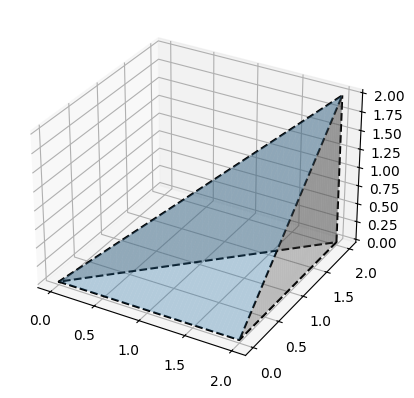

In [142]:
xint = np.linspace(0,2)
xx = np.vstack([xint, xint])
yy = np.vstack([np.zeros_like(xint), xint])
zz = np.vstack([np.zeros_like(xint), xint])
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.3)

xx = np.vstack([2*np.ones_like(xint), 2*np.ones_like(xint)])
yy = np.vstack([xint, xint])
zz = np.vstack([np.zeros_like(xint), xint])
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

xx = np.vstack([xint, xint])
yy = np.vstack([xint, xint])
zz = np.vstack([np.zeros_like(xint), xint])
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

ax.plot([0, 2, 2, 0, 2, 2], [0, 0, 2, 0, 2, 0], [0, 0, 0, 0, 2, 0], 'k--')
ax.plot([2, 2], [2, 2], [0, 2], 'k--')

plt.savefig('img/ch-7/7-2-1-6.png', dpi=600, bbox_inches='tight')


In [ ]:
T = lambda x, y: np.array([x**2 + y**2 , x*y])
ax = plt.figure().add_subplot(projection='3d')
x0, x1, y0, y1 = 1, 2, 1, 2
xintv, yintv = np.linspace(x0, x1), np.linspace(y0, y1)
xx, yy = np.meshgrid(np.linspace(x0, x0+dx), np.linspace(y0, y0+dy))
zz = T(xx, yy)

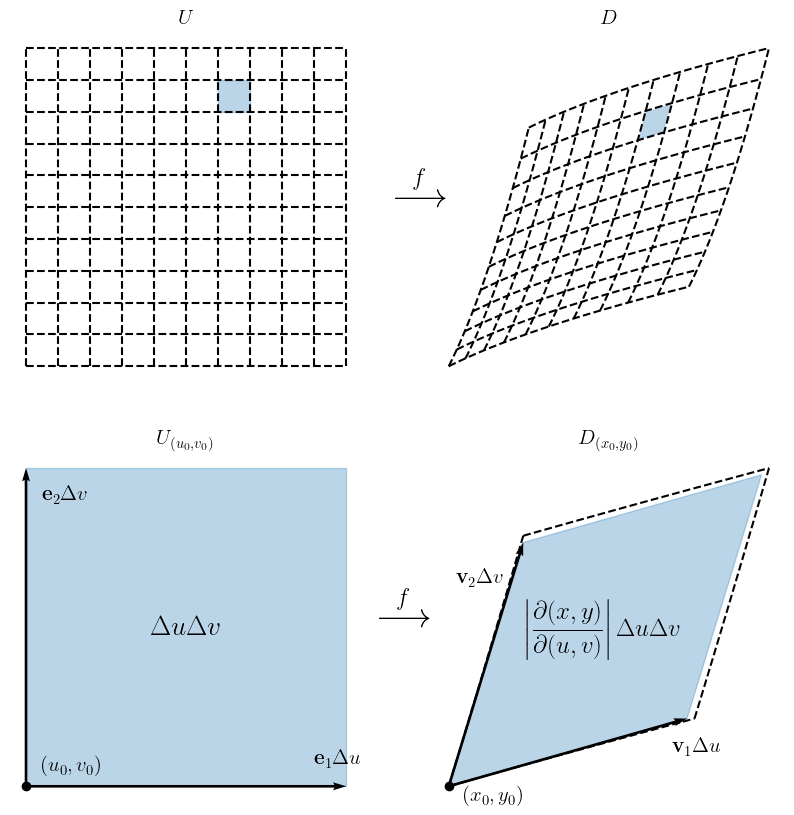

In [62]:
import numpy as np
import matplotlib.pyplot as plt

T = lambda x, y: np.array([x**2 + y , x + y**2])

_, ax = plt.subplots(2,2, figsize=(10, 10))
ax = ax.ravel()
n = 10
x0, x1, y0, y1 = 1, 2, 1, 2
dx, dy = (x1-x0)/n, (y1-y0)/n

for i in range(n+1):
    xt = np.linspace(x0, x1)
    yt = np.ones_like(xt)*(y0 + i*dy)
    ax[0].plot(xt, yt, 'k--')
    ax[1].plot(*T(xt, yt), 'k--')

    yt = np.linspace(y0, y1)
    xt = np.ones_like(yt)*(x0 + i*dx)
    ax[0].plot(xt, yt, 'k--')
    ax[1].plot(*T(xt, yt), 'k--')

i0, j0 = 6, 8
ax[0].fill_between(np.linspace(x0+i0*dx, x0+(i0+1)*dx), y0+j0*dy, y0+(j0+1)*dy, color='C0', alpha=0.3)
DT = lambda x, y: np.array([[2*x, 1], [1, 2*y]])
v, w = np.array([2*(x0+i0*dx), 1]), np.array([1, 2*(y0+j0*dy)])
pt = np.vstack([np.zeros(2), v, v+w, w])/10 + T(x0+i0*dx, y0+j0*dy)
ax[1].fill(*pt.T, 'C0', alpha=.3)
ax[0].set_xlabel(r'$u$', usetex=True, fontsize=15)
ax[0].set_ylabel(r'$v$', usetex=True, fontsize=15)
ax[1].set_xlabel(r'$x$', usetex=True, fontsize=15)
ax[1].set_ylabel(r'$y$', usetex=True, fontsize=15)
ax[0].set_title(r'$U$', usetex=True, fontsize=15)
ax[1].set_title(r'$D$', usetex=True, fontsize=15)

x0, y0, delta = 1.6, 1.8, .1
pt = np.vstack([np.array([x0, y0]),
                np.array([x0+delta, y0]),
                np.array([x0+delta, y0+delta]),
                np.array([x0, y0+delta])])
ax[2].fill(*pt.T, color='C0', alpha=.3)
ax[2].quiver(x0, y0, delta, 0, angles='xy', scale_units='xy', scale=1, color='k')
ax[2].quiver(x0, y0, 0, delta, angles='xy', scale_units='xy', scale=1, color='k')
ax[2].text(x0+delta/2, y0+delta/2, r'$\Delta u \Delta v$', fontsize=20, ha='center', va='center', usetex=True)
ax[2].set_xlabel(r'$u$', usetex=True, fontsize=15)
ax[2].set_ylabel(r'$v$', usetex=True, fontsize=15)
ax[2].set_title(r'$U_{(u_0 ,v_0)}$', usetex=True, fontsize=15)

u0, v0 = T(x0, y0)[0], T(x0, y0)[1]
w1, w2 = np.array([2*x0, 1])/10, np.array([1, 2*y0])/10
pt = np.vstack([np.array([u0, v0]),
                np.array([u0+w1[0], v0+w1[1]]),
                np.array([u0+w1[0]+w2[0], v0+w1[1]+w2[1]]),
                np.array([u0+w2[0], v0+w2[1]])])
ax[3].fill(*pt.T, color='C0', alpha=.3)
ax[3].quiver(u0, v0, w1[0], w1[1], angles='xy', scale_units='xy', scale=1, color='k')
ax[3].quiver(u0, v0, w2[0], w2[1], angles='xy', scale_units='xy', scale=1, color='k')
ax[3].text(u0+(w1[0]+w2[0])/2, v0+(w1[1]+w2[1])/2, r'$\displaystyle\left|\frac{\partial(x,y)}{\partial(u,v)}\right|\Delta u \Delta v$', 
           fontsize=18, ha='center', va='center', usetex=True)
ax[3].set_xlabel(r'$x$', usetex=True, fontsize=15)
ax[3].set_ylabel(r'$y$', usetex=True, fontsize=15)
ax[3].set_title(r'$D_{(x_0 ,y_0)}$', usetex=True, fontsize=15)

xt = np.linspace(x0, x0+delta)
yt = np.ones_like(xt)*y0
ax[3].plot(*T(xt, yt), 'k--')
xt = np.linspace(x0, x0+delta)
yt = np.ones_like(xt)*(y0+delta)
ax[3].plot(*T(xt, yt), 'k--')
yt = np.linspace(y0, y0+delta)
xt = np.ones_like(yt)*x0
ax[3].plot(*T(xt, yt), 'k--')
yt = np.linspace(y0, y0+delta)
xt = np.ones_like(yt)*(x0 +delta)
ax[3].plot(*T(xt, yt), 'k--')

for i in range(4):
    ax[i].axis('off')

ax[3].plot(*T(x0, y0), 'ko')
ax[3].text(*T(x0, y0)+np.array([.02, -.02]), r'$(x_0, y_0)$', fontsize=15, usetex=True)
ax[3].text(*T(x0, y0)+np.array([.3, .05]), r'$\mathbf{v}_1 \Delta u$', fontsize=15, usetex=True)
ax[3].text(*T(x0, y0)+np.array([.01, .3]), r'$\mathbf{v}_2 \Delta v$', fontsize=15, usetex=True)


ax[2].plot(x0, y0, 'ko')
ax[2].text(x0+.005, y0+.005, r'$(u_0, v_0)$', fontsize=15, usetex=True)
ax[2].text(x0+.09, y0+0.007, r'$\mathbf{e}_1 \Delta u$', fontsize=15, usetex=True)
ax[2].text(x0+.005, y0+.09, r'$\mathbf{e}_2 \Delta v$', fontsize=15, usetex=True)

ax[0].text(2.15, 1.5, r'$\stackrel{f}{\longrightarrow}$', fontsize=25, usetex=True)
ax[2].text(x0+.11, y0+delta/2, r'$\stackrel{f}{\longrightarrow}$', fontsize=25, usetex=True)

plt.savefig('img/ch-7/7-2-2-1.png', dpi=600, bbox_inches='tight')


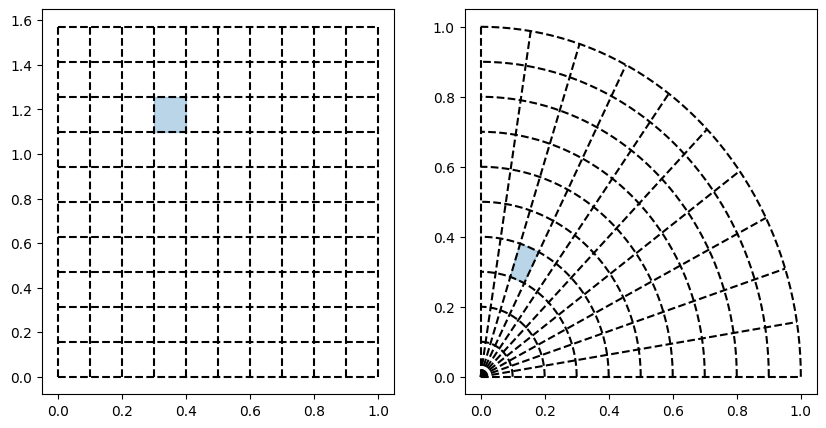

In [ ]:
_, ax = plt.subplots(1,2, figsize=(10, 5))
ax = ax.ravel()
r0, r1, t0, t1 = 0, 1, 0, np.pi/2
n, dr, dtheta = 10, (r1 - r0)/n, (t1 - t0)/n
T = lambda r, theta: np.array([r*np.cos(theta), r*np.sin(theta)])
for i in range(n+1):
    t = np.linspace(0, 1)
    r = np.ones_like(t) * (r0 + i*dr)
    theta = np.linspace(t0, t1)
    ax[0].plot(r, theta, 'k--')
    ax[1].plot(*T(r, theta), 'k--')
    r = np.linspace(r0, r1)
    theta = np.ones_like(r) * (t0 + i*dtheta)
    ax[0].plot(r, theta, 'k--')
    ax[1].plot(*T(r, theta), 'k--')

i0, j0 = 3, 7
uv = np.vstack([
    np.array([r0 + i0*dr, t0 + j0*dtheta]),
    np.array([r0 + (i0+1)*dr, t0 + j0*dtheta]),
    np.array([r0 + (i0+1)*dr, t0 + (j0+1)*dtheta]),
    np.array([r0 + i0*dr, t0 + (j0+1)*dtheta])])
ax[0].fill(*uv.T, color='C0', alpha=.3)
ax[1].fill(*T(*uv.T), color='C0', alpha=.3)

plt.savefig('img/ch-7/7-2-2-2.png', dpi=600, bbox_inches='tight')


In [80]:
for k in range(2, 6):
    n = 10**k
    i0, j0 = 3*10**(k-1), 7*10**(k-1)
    areaU = 1/n * np.pi/(2*n)
    areaD = 1/2 * ((i0+1)**2 - i0**2)/n**2 * np.pi/(2*n)
    print(f'%.3f' % (areaU/areaD))

3.279
3.328
3.333
3.333


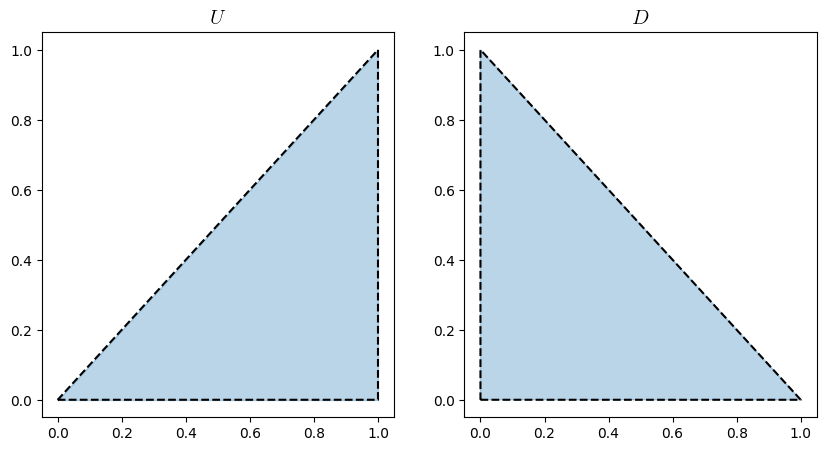

In [91]:
_, ax = plt.subplots(1,2, figsize=(10, 5))
uv = np.vstack([np.array([0, 0]),
                np.array([1, 0]),
                np.array([1, 1]),
                np.array([0, 0])])
ax[0].plot(*uv.T, 'k--')
ax[0].fill(*uv.T, color='C0', alpha=.3)
ax[0].set_title(r'$U$', usetex=True, fontsize=15)
T = lambda u, v: np.array([u-v, v])
ax[1].plot(*T(*uv.T), 'k--')
ax[1].fill(*T(*uv.T), color='C0', alpha=.3)
ax[1].set_title(r'$D$', usetex=True, fontsize=15)

plt.savefig('img/ch-7/7-2-2-3.png', dpi=600, bbox_inches='tight')


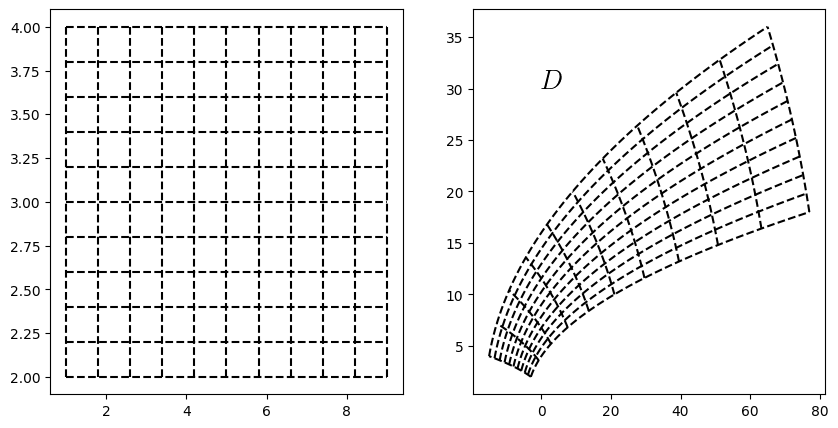

In [ ]:
_, ax = plt.subplots(1,2, figsize=(10, 5))
u0, u1, v0, v1, n = 1, 9, 2, 4, 10
du, dv = (u1 - u0)/n, (v1 - v0)/n
Tinv = lambda x, y: np.array([x**2 - y**2 , x*y])
for i in range(n+1):
    ut = np.linspace(u0, u1)
    vt = np.ones_like(ut)*(v0 + i*dv)
    ax[0].plot(ut, vt, 'k--')
    ax[1].plot(*Tinv(ut, vt), 'k--')

    vt = np.linspace(v0, v1)
    ut = np.ones_like(vt)*(u0 + i*du)
    ax[0].plot(ut, vt, 'k--')
    ax[1].plot(*Tinv(ut, vt), 'k--')
ax[1].text(0, 30, r'$D$', fontsize=20, usetex=True)

# plt.savefig('img/ch-7/7-2-2-4.png', dpi=600, bbox_inches='tight')


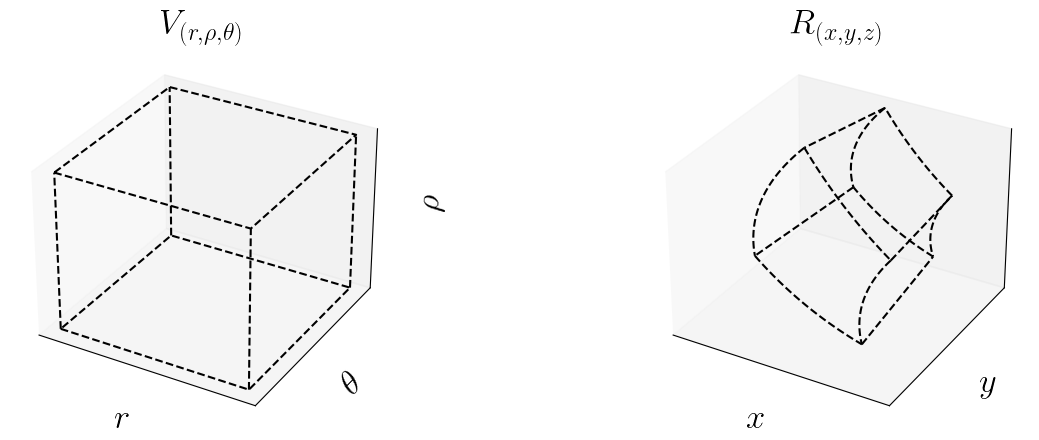

In [ ]:
T = lambda r, theta, rho: np.array([r*np.sin(theta)*np.cos(rho), r*np.sin(theta)*np.sin(rho), r*np.cos(theta)])
_, ax = plt.subplots(1,2, figsize=(15, 5), subplot_kw={'projection': '3d'})
n = 10
i0, j0, k0 = 3, 7, 5
r0, t0, rho0 = i0/n, j0/n*np.pi, k0/n*2*np.pi
dr, dtheta, drho = 1/n, np.pi/n, 2*np.pi/n

rrt = np.array([[r0, t0, rho0],
                [r0+dr, t0, rho0],
                [r0+dr, t0+dtheta, rho0],
                [r0, t0+dtheta, rho0],
                [r0, t0, rho0+drho],
                [r0+dr, t0, rho0+drho],
                [r0+dr, t0+dtheta, rho0+drho],
                [r0, t0+dtheta, rho0+drho]])
# draw boundary of cube
ax[0].plot(*rrt[[0, 1, 2, 3, 0]].T, 'k--')
ax[0].plot(*rrt[[4, 5, 6, 7, 4]].T, 'k--')
for i in range(4):
    ax[0].plot(*rrt[[i, i+4]].T, 'k--')
ax[0].set_xlabel(r'$r$', usetex=True, fontsize=25)
ax[0].set_ylabel(r'$\theta$', usetex=True, fontsize=25)
ax[0].set_zlabel(r'$\rho$', usetex=True, fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_zticks([])
ax[0].set_title(r'$V_{(r,\rho,\theta)}$', usetex=True, fontsize=25)   
# ax[0].axis('off')

# draw boundary of image
t = np.linspace(0, 1)
pair = [[0, 1], [1, 2], [2, 3], [3, 0], [4, 5], [5, 6], [6, 7], [7, 4], [0, 4], [1, 5], [2, 6], [3, 7]]
for p in pair:
    uvw = rrt[p[0]] + t[:, np.newaxis] * (rrt[p[1]] - rrt[p[0]])
    ax[1].plot(*T(*uvw.T), 'k--')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_zticks([])
ax[1].set_xlabel(r'$x$', usetex=True, fontsize=25)
ax[1].set_ylabel(r'$y$', usetex=True, fontsize=25)
ax[1].set_zlabel(r'$z$', usetex=True, fontsize=25)
ax[1].set_title(r'$R_{(x,y,z)}$', usetex=True, fontsize=25)

# plt.savefig('img/ch-7/7-2-2-4.png', dpi=600, bbox_inches='tight')
# ax[1].axis('off')

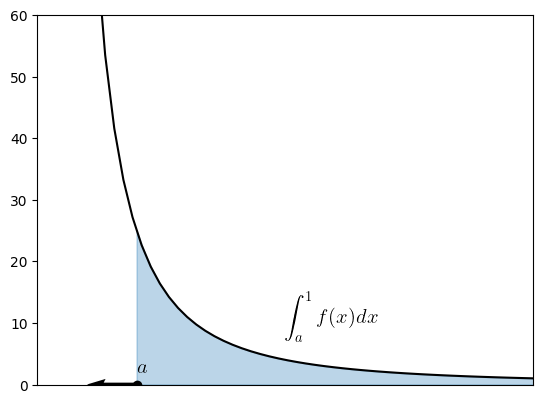

In [ ]:
t = np.linspace(0.1, 1)
plt.plot(t, 1/t**2, 'k')
a = .2
t = np.linspace(a, 1)
plt.fill_between(t, 0, 1/t**2, color='C0', alpha=.3)
plt.xlim([0, 1])
plt.ylim([0, 60])
plt.xticks([])
plt.plot(a, 0, 'ko')
plt.text(a, 2, r'$a$', fontsize=15, usetex=True)
plt.quiver(a, 0, -.1, 0, angles='xy', scale_units='xy', scale=1, color='k')
plt.text(.5, 10, r'$\displaystyle\int_a^1 f(x)dx$', fontsize=15, usetex=True)

# plt.savefig('img/ch-7/7-2-3-1.png', dpi=600, bbox_inches='tight')

C:\Users\hyosa\AppData\Local\Temp\ipykernel_25680\2525198815.py:3: RuntimeWarning: divide by zero encountered in divide
  ax[0].plot(t, 1/t**2, 'k')
C:\Users\hyosa\AppData\Local\Temp\ipykernel_25680\2525198815.py:4: RuntimeWarning: divide by zero encountered in divide
  ax[0].fill_between(t, 0, 1/t**2, color='C0', alpha=.3)
C:\Users\hyosa\AppData\Local\Temp\ipykernel_25680\2525198815.py:5: RuntimeWarning: divide by zero encountered in divide
  ax[1].plot(t, 1/np.sqrt(t), 'k')
C:\Users\hyosa\AppData\Local\Temp\ipykernel_25680\2525198815.py:6: RuntimeWarning: divide by zero encountered in divide
  ax[1].fill_between(t, 0, 1/np.sqrt(t), color='C0', alpha=.3)


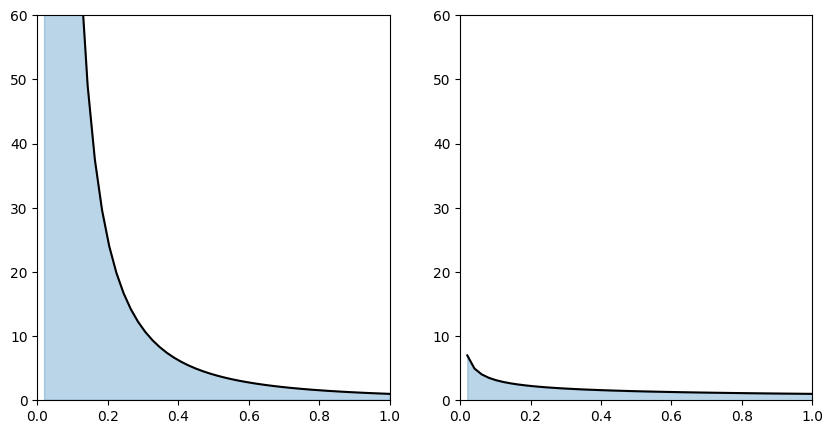

In [ ]:
_, ax = plt.subplots(1,2, figsize=(10, 5))
t = np.linspace(0, 1)
ax[0].plot(t, 1/t**2, 'k')
ax[0].fill_between(t, 0, 1/t**2, color='C0', alpha=.3)
ax[1].plot(t, 1/np.sqrt(t), 'k')
ax[1].fill_between(t, 0, 1/np.sqrt(t), color='C0', alpha=.3)
for i in range(2):
    ax[i].set_xlim([0, 1])
    ax[i].set_ylim([0, 60])

# plt.savefig('img/ch-7/7-2-3-2.png', dpi=600, bbox_inches='tight')

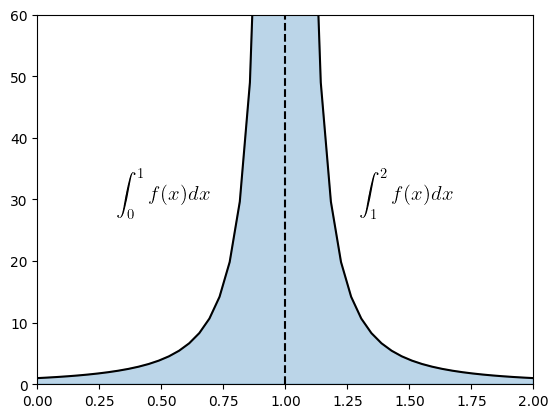

In [ ]:
t = np.linspace(0, 2)
plt.plot(t, 1/(t-1)**2, 'k')
plt.fill_between(t, 0, 1/(t-1)**2, color='C0', alpha=.3)
plt.plot([1, 1], [0, 60], 'k--')
plt.xlim([0, 2])
plt.ylim([0, 60])
plt.text(1.3, 30, r'$\displaystyle\int_1^2 f(x)dx$', fontsize=15, usetex=True)
plt.text(.7, 30, r'$\displaystyle\int_0^1 f(x)dx$', fontsize=15, usetex=True, ha='right')

# plt.savefig('img/ch-7/7-2-3-3.png', dpi=600, bbox_inches='tight') 


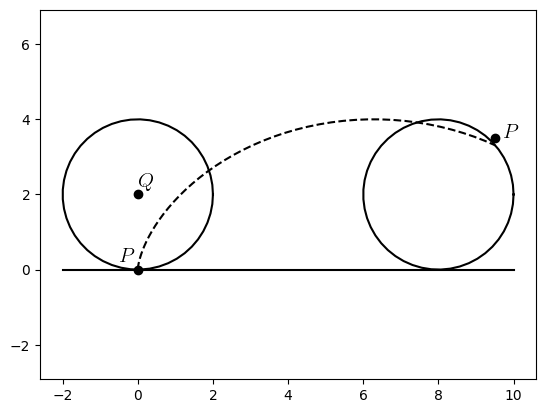

In [ ]:
a = 2 
t = np.linspace(0, 2*np.pi)

plt.plot(a*np.cos(t), a*np.sin(t)+a, 'k')

t1 = 4
plt.plot(a*np.cos(t)+a*t1, a*np.sin(t)+a, 'k')

t = np.linspace(0, t1)
x = a*np.cos(-t-np.pi/2) + a*t
y = a*np.sin(-t-np.pi/2) + a
plt.plot(x, y, 'k--')
plt.plot([0, 0], [0, a], 'ko')
plt.plot(a*np.cos(-t1-np.pi/2) + a*t1,  a*np.sin(-t1-np.pi/2) + a +.2, 'ko')
plt.text(-.5, .2, r'$P$', fontsize=15, usetex=True)
plt.text(0, a+.2, r'$Q$', fontsize=15, usetex=True)

plt.text(a*np.cos(-t1-np.pi/2) + a*t1+.2, a*np.sin(-t1-np.pi/2) + a +.2, r'$P$', fontsize=15, usetex=True)
plt.plot([-2, 10], [0, 0], 'k')
plt.axis('equal')

# plt.savefig('img/ch-7/7-3-1-1.png', dpi=600, bbox_inches='tight')

5.824
6.095
6.097
6.097
6.283185307179586


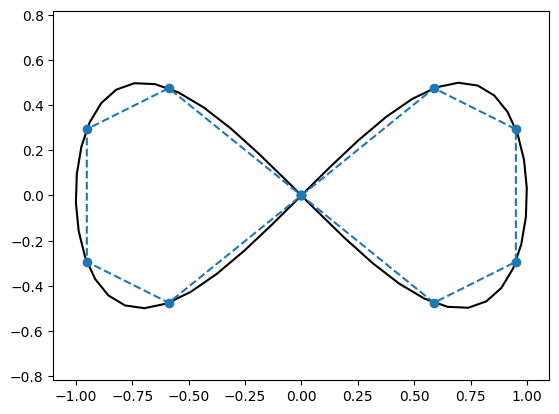

In [228]:
t = np.linspace(0, 2*np.pi)
c = lambda t: np.array([np.sin(t), np.cos(t)*np.sin(t)])
plt.plot(*c(t), 'k')

for i in range(4):
    n = 10**(i+1)
    t = np.linspace(0, 2*np.pi, n+1)
    length = 0
    for j in range(n):
        length += np.sqrt(np.sum((c(t[j+1]) - c(t[j]))**2))
    print(f'%.3f' % length)
    if i == 0:
        plt.plot(*c(t), 'o--', color='C0')
plt.axis('equal')

print(2*np.pi)
# plt.savefig('img/ch-7/7-3-1-2.png', dpi=600, bbox_inches='tight')

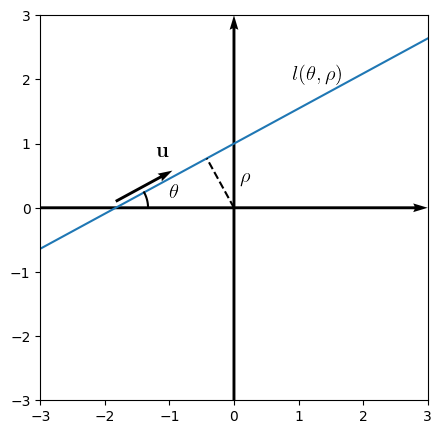

In [269]:
theta = .5
v = np.array([np.cos(theta), np.sin(theta)])
t = np.linspace(-10, 10)

plt.quiver(-3, 0, 6, 0, angles='xy', scale_units='xy', scale=1, color='k')
plt.quiver(0, -3, 0, 6, angles='xy', scale_units='xy', scale=1, color='k')
plt.plot( *(np.array([0, 1]) + v*t[:, np.newaxis]).T )
plt.xlim([-3, 3])
plt.ylim([-3, 3])

x0 = np.array([-1/np.tan(theta), 0])
r = .5
tt = np.linspace(0, theta)
plt.plot(x0[0] + r*np.cos(tt), x0[1] + r*np.sin(tt), 'k')
plt.text(-1, .15, r'$\theta$', fontsize=15, usetex=True)
x1 = np.array([-np.cos(theta)*np.sin(theta), np.cos(theta)**2])
plt.plot([0, x1[0]], [0, x1[1]], 'k--')
plt.text(x1[0]/2+.3, x1[1]/2, r'$\rho$', fontsize=15, usetex=True)
plt.text(.9, 2, r'$l(\theta, \rho)$', fontsize=15, usetex=True)
plt.quiver(x0[0], x0[1]+.1, np.cos(theta), np.sin(theta), angles='xy', scale_units='xy', scale=1, color='k')
plt.text(-1.2, .8, r'$\mathbf{u}$', fontsize=15, usetex=True)
plt.gca().figure.set_size_inches(5, 5)

plt.savefig('img/ch-7/7-3-1-3.png', dpi=600, bbox_inches='tight')

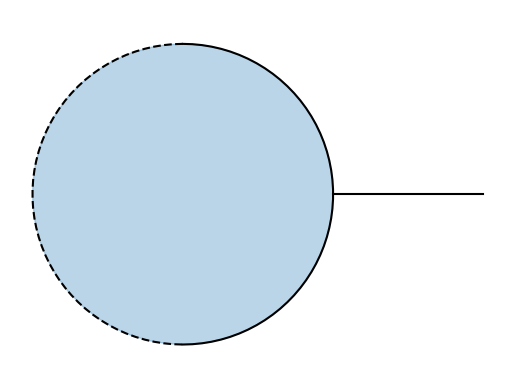

In [9]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2*np.pi)
x = np.cos(t)
y = np.sin(t)
plt.fill(x,y, color='C0', alpha=.3)

t = np.linspace(np.pi/2, -np.pi/2)
plt.plot(np.cos(t), np.sin(t), 'k')
t = np.linspace(np.pi/2, 3*np.pi/2)
plt.plot(np.cos(t), np.sin(t), 'k--')
plt.plot([1, 2], [0, 0], 'k')
plt.axis('equal')
plt.axis('off')
plt.savefig('img/ch-7/7-3-2-1.png', dpi=600, bbox_inches='tight')

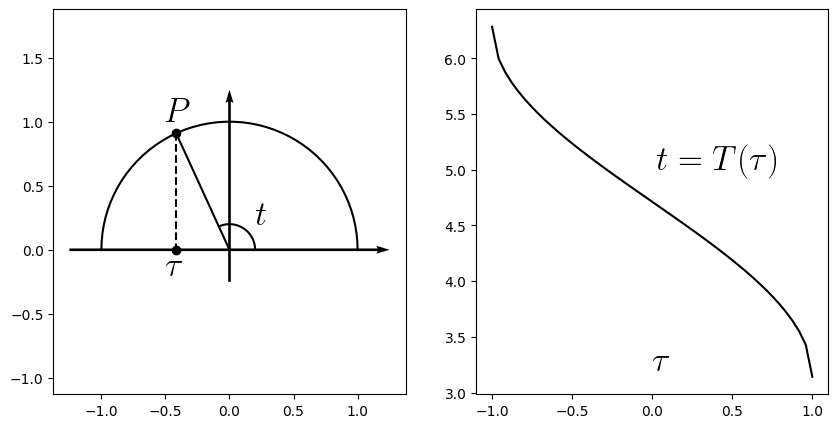

In [ ]:
_, ax = plt.subplots(1,2, figsize=(10, 5))
t = np.linspace(0, np.pi)
ax[0].plot(np.cos(t), np.sin(t), 'k')
ax[0].quiver(-1.25, 0, 2.5, 0, angles='xy', scale_units='xy', scale=1, color='k')
ax[0].quiver(0, -.25, 0, 1.5, angles='xy', scale_units='xy', scale=1, color='k')
t0 = 2
ax[0].plot([0, np.cos(t0)], [0, np.sin(t0)], 'k')
ax[0].plot([np.cos(t0), np.cos(t0)], [np.sin(t0), 0], 'ko--')

t = np.linspace(0, t0)
ax[0].plot(.2*np.cos(t), .2*np.sin(t), 'k')
ax[0].text(.2, .2, r'$t$', fontsize=25, usetex=True)
ax[0].text(-.5, -.2, r'$\tau$', fontsize=25, usetex=True)
ax[0].text(-.5, 1., r'$P$', fontsize=25, usetex=True)
ax[0].plot(1.25, 0, '.', markersize=0)
ax[0].axis('equal')

tau = np.linspace(-1, 1)

ax[1].plot(tau, np.pi + np.arccos(tau), 'k')
ax[1].text(0, 3.2, r'$\tau$', fontsize=25, usetex=True)
ax[1].text(.8, 5, r'$t=T(\tau)$', fontsize=25, usetex=True, ha='right')

plt.savefig('img/ch-7/7-3-1-2.png', dpi=600, bbox_inches='tight')

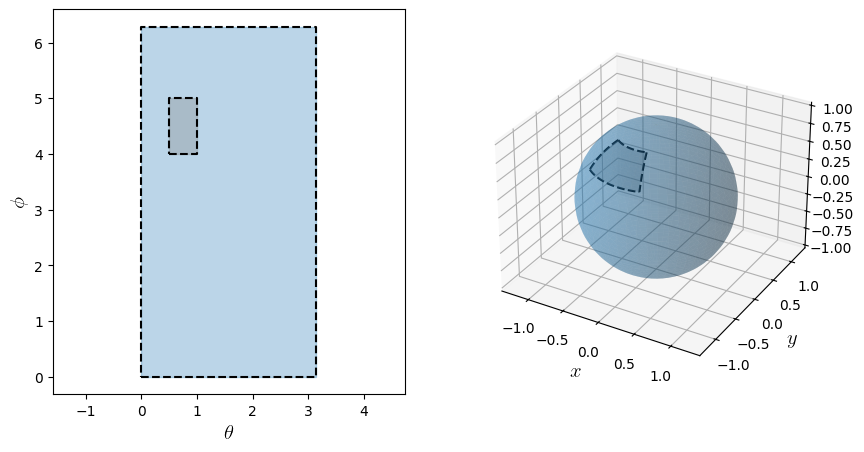

In [71]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].fill([0, np.pi, np.pi, 0], [0, 0, 2*np.pi, 2*np.pi], color='C0', alpha=.3)
ax[0].plot([0, np.pi, np.pi, 0, 0], [0, 0, 2*np.pi, 2*np.pi, 0], 'k--')
ax[0].axis('equal')

t0, t1, p0, p1 = .5, 1, 4, 5
ax[0].fill([t0, t1, t1, t0], [p0, p0, p1, p1], color='gray', alpha=.3)
ax[0].plot([t0, t1, t1, t0, t0], [p0, p0, p1, p1, p0], 'k--')
ax[0].set_xlabel(r'$\theta$', usetex=True, fontsize=15)
ax[0].set_ylabel(r'$\phi$', usetex=True, fontsize=15)

s = lambda t, p: np.array([np.sin(t)*np.cos(p), np.sin(t)*np.sin(p), np.cos(t)])
ax[1].axis('off')
ax[1] = fig.add_subplot(1, 2, 2, projection='3d')
tt, pp = np.meshgrid(np.linspace(0, np.pi), np.linspace(0, 2*np.pi))
ax[1].plot_surface(*s(tt, pp), alpha=.3)

tintv, pintv = np.linspace(t0, t1), np.linspace(p0, p1)
tt, pp = np.meshgrid(tintv, pintv)
ax[1].plot_surface(*s(tt, pp), alpha=.3, color='gray')
ax[1].plot(*s(tintv, p0*np.ones_like(tintv)), 'k--')
ax[1].plot(*s(tintv, p1*np.ones_like(tintv)), 'k--')
ax[1].plot(*s(t0*np.ones_like(pintv), pintv), 'k--')
ax[1].plot(*s(t1*np.ones_like(pintv), pintv), 'k--')
ax[1].axis('equal')
ax[1].set_xlabel(r'$x$', usetex=True, fontsize=15)
ax[1].set_ylabel(r'$y$', usetex=True, fontsize=15)

plt.savefig('img/ch-7/7-3-2-2.png', dpi=600, bbox_inches='tight')

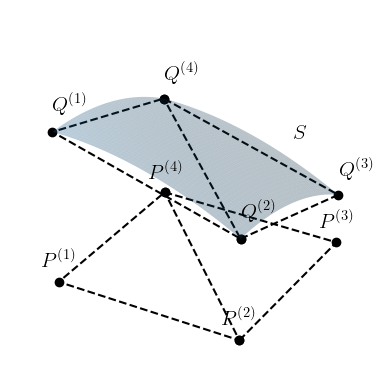

In [123]:
xx, yy = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))
ax = plt.figure().add_subplot(projection='3d')
f = lambda x, y: 1 - x**2 - y**2
ax.plot_surface(xx, yy, f(xx,yy), alpha=.3)
x0, x1, y0, y1 = 0, 1, 0, 1
pt = np.vstack([np.array([x1, x1, x0, x0, x1, x0]), 
                np.array([y0, y1, y1, y0, y0, y1]), 
                -2*np.ones(6)])
s = lambda x, y, z: np.array([x, y, f(x,y)])
ax.plot(*s(*pt), 'ko--')
ax.plot(*pt, 'ko--')
ax.axis('off')
label = [r'$P^{(2)}$', r'$P^{(3)}$', r'$P^{(4)}$', r'$P^{(1)}$']
for i in range(4):
    ax.text(*pt[:,i]+np.array([-.1,0,.2]), label[i], fontsize=15, usetex=True)

label = [r'$Q^{(2)}$', r'$Q^{(3)}$', r'$Q^{(4)}$', r'$Q^{(1)}$']
for i in range(4):
    ax.text(*s(*pt)[:,i]+np.array([0,0,.4]), label[i], fontsize=15, usetex=True)

ax.text(1, .5, 1, r'$S$', fontsize=15, usetex=True)

plt.savefig('img/ch-7/7-3-2-3.png', dpi=600, bbox_inches='tight')

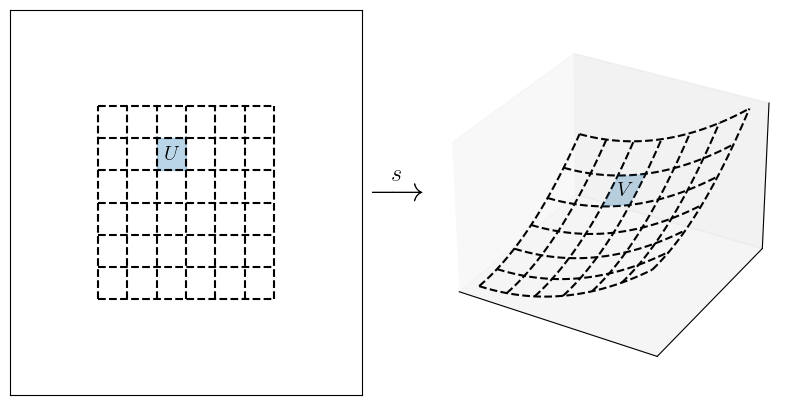

In [154]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[1].axis('off')
ax[1] = fig.add_subplot(1, 2, 2, projection='3d')
n = 6
uintv, vintv = np.linspace(0, 1, n+1), np.linspace(0, 1, n+1)
uu, vv = np.meshgrid(uintv, vintv)
f = lambda u, v: np.array([u, v, u**2 + v**2])
for i in range(n+1):
    ax[0].plot(uu[i], vv[i], 'k--')
    ax[0].plot(uu[:,i], vv[:,i], 'k--')
    t = np.linspace(0, 1)
    ax[1].plot(*f(np.ones_like(t)*uintv[i], t), 'k--')
    ax[1].plot(*f(t, np.ones_like(t)*vintv[i]), 'k--')
ax[0].set_xlim([-.5, 1.5])
ax[0].set_ylim([-.5, 1.5])
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[0].text(1.55, .5, r'$\stackrel{s}{\longrightarrow}$', fontsize=25, usetex=True)

i0, j0 = 2, 4
ax[0].fill_between(uintv[i0:i0+2], vintv[j0], vintv[j0+1], color='C0', alpha=.3)
ax[0].text((uintv[i0]+uintv[i0+1])/2, (vintv[j0]+vintv[j0+1])/2, r'$U$', fontsize=15, usetex=True, ha='center', va='center')
uu, vv = np.meshgrid(np.linspace(uintv[i0], uintv[i0+1]), np.linspace(vintv[j0], vintv[j0+1]))
p = f((uintv[i0]+uintv[i0+1])/2, (vintv[j0]+vintv[j0+1])/2)
ax[1].text(*p, r'$V$', fontsize=15, usetex=True, ha='center', va='center')
ax[1].plot_surface(*f(uu, vv), alpha=.3)

ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_zticks([])

plt.savefig('img/ch-7/7-3-2-4.png', dpi=600, bbox_inches='tight')


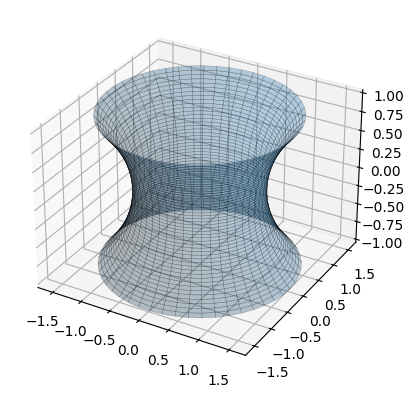

In [158]:
zintv, tintv = np.linspace(-1, 1), np.linspace(0, 2*np.pi)
zz, tt = np.meshgrid(zintv, tintv)
ax = plt.figure().add_subplot(projection='3d')
f = lambda z: (np.exp(z) + np.exp(-z))/2
ax.plot_surface(f(zz)*np.cos(tt), f(zz)*np.sin(tt), zz, alpha=.3, lw=.3, edgecolor='k')

plt.savefig('img/ch-7/7-3-2-5.png', dpi=600, bbox_inches='tight')

In [ ]:
import pygame

tbox_w, tbox_h = 100, 50

pygame.init()
screen = pygame.display.set_mode((800, 600))
pygame.draw.rect(screen, (255, 255, 255), (0, 0, tbox_w, tbox_h))

play = True
while play:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            play = False
    pygame.display.flip()

pygame.quit()

In [6]:
import pygame

tbox_w, tbox_h = 100, 50

pygame.init()
screen = pygame.display.set_mode((800, 600))
pygame.draw.rect(screen, (255, 255, 255), (0, 0, tbox_w, tbox_h))

play = True
while play:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            play = False
        if event.type == pygame.MOUSEBUTTONDOWN:
            if pygame.mouse.get_pressed()[0]:
                x, y = pygame.mouse.get_pos()
                pygame.draw.circle(screen, (255, 255, 255), (x, y), 3)
    if pygame.mouse.get_pressed()[0]:
        new_x, new_y = pygame.mouse.get_pos()
        pygame.draw.line(screen, (255, 255, 255), (x, y), (new_x, new_y), 5)
        x, y = new_x, new_y
    pygame.display.flip()

pygame.quit()


In [ ]:
import pygame
import numpy as np

tbox_w = 100
tbox_h = 50

def intersections(arry: np.array) -> int:
    num_intrs = 0
    is_black = True
    for i in range(len(arry)):
        if arry[i] == 1 and is_black:
            num_intrs += 1
            is_black = False
        elif arry[i] == 0:
            is_black = True
    return num_intrs

step = 10
def crofton_length(screen) -> float:
    num_intrs = 0
    img = pygame.surfarray.pixels3d(screen)
    height, width = screen.get_size()
    non = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            if 0 <= i <= tbox_w and 0 <= j <= tbox_h: continue
            non[i, j] = 1 if img[i, j][0] == 255 else 0
    for i in range(0, width, step):
        num_intrs += intersections(non[:, i])
    for j in range(0, height, step):
        num_intrs += intersections(non[j, :])
    return num_intrs * np.pi/2 * 0.1 /2



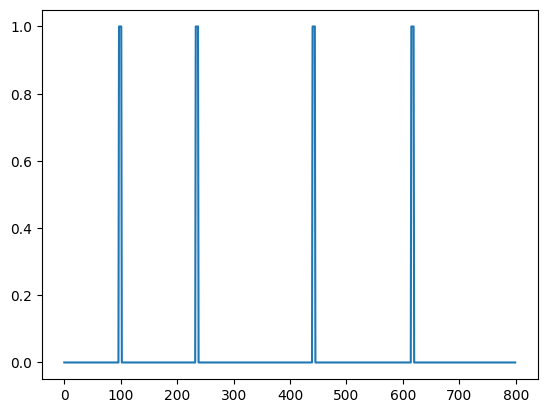

In [14]:
import pygame

pygame.init()
pygame.font.init()
font = pygame.font.SysFont('Comic Sans MS', 30)
screen = pygame.display.set_mode((800, 600))
pygame.draw.rect(screen, (255, 255, 255), (0, 0, tbox_w, tbox_h))

play = True
while play:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            play = False
        if event.type == pygame.MOUSEBUTTONDOWN:
            if pygame.mouse.get_pressed()[0]:
                x, y = pygame.mouse.get_pos()
                pygame.draw.circle(screen, (255, 255, 255), (x, y), 3)
            if pygame.mouse.get_pressed()[2]:
                screen.fill((0, 0, 0))
        if event.type == pygame.MOUSEBUTTONUP:
            length = crofton_length(screen)
            text = font.render(f'%.1f'%length, True, (0, 0, 0))
            screen.fill((255, 255, 255), (0, 0, tbox_w, tbox_h))
            screen.blit(text, (20, 5))
    if pygame.mouse.get_pressed()[0]:
        new_x, new_y = pygame.mouse.get_pos()
        pygame.draw.line(screen, (255, 255, 255), (x, y), (new_x, new_y), 5)
        x, y = new_x, new_y
    pygame.display.flip()

pygame.quit()

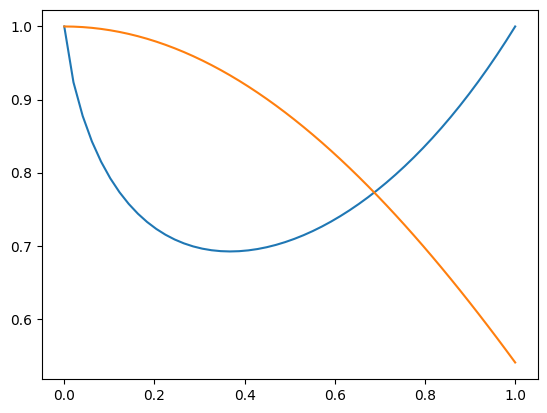

In [14]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1)
plt.plot(t, t**t)
plt.plot(t, np.cos(t))

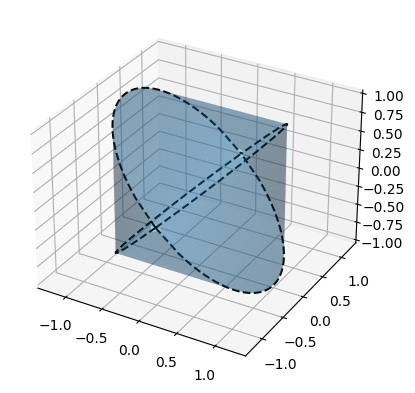

In [22]:
t = np.linspace(0, 2*np.pi)
r = np.linspace(0, 1)
rr, tt = np.meshgrid(r, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(rr*np.cos(tt), rr*np.sin(tt), np.sqrt(1-(rr*np.sin(tt))**2), alpha=.3, color='C0')
ax.plot_surface(rr*np.cos(tt), rr*np.sin(tt), -np.sqrt(1-(rr*np.sin(tt))**2), alpha=.3, color='C0')
ax.plot_surface(np.sqrt(1-(rr*np.cos(tt))**2), rr*np.cos(tt), rr*np.sin(tt), alpha=.3, color='C0')
ax.plot_surface(-np.sqrt(1-(rr*np.cos(tt))**2), rr*np.cos(tt), rr*np.sin(tt), alpha=.3, color='C0')

t = np.linspace(-1, 1)
ax.plot(np.sqrt(1-t**2), t, np.sqrt(1-t**2), 'k--')
ax.plot(-np.sqrt(1-t**2), t, np.sqrt(1-t**2), 'k--')
ax.plot(-np.sqrt(1-t**2), t, -np.sqrt(1-t**2), 'k--')
ax.plot(np.sqrt(1-t**2), t, -np.sqrt(1-t**2), 'k--')

ax.axis('equal')

plt.savefig('img/ch-7/7-4-1-1.png', dpi=600, bbox_inches='tight')

In [81]:
%matplotlib inline

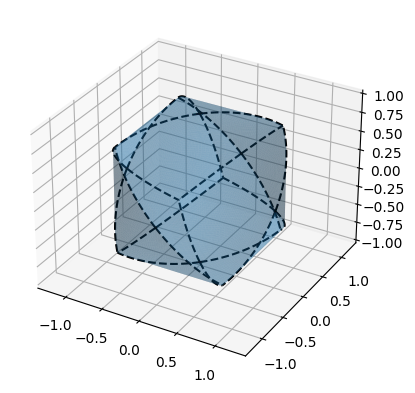

In [23]:

ax = plt.figure().add_subplot(projection='3d')
t = np.linspace(-np.pi/4, np.pi/4)
r = np.linspace(0, 1)
rr, tt = np.meshgrid(r, t)
ax.plot_surface(rr*np.cos(tt), rr*np.sin(tt), np.sqrt(1-(rr*np.cos(tt))**2), alpha=.3, color='C0')
ax.plot_surface(-rr*np.cos(tt), -rr*np.sin(tt), np.sqrt(1-(rr*np.cos(tt))**2), alpha=.3, color='C0')
ax.plot_surface(rr*np.cos(tt), rr*np.sin(tt), -np.sqrt(1-(rr*np.cos(tt))**2), alpha=.3, color='C0')
ax.plot_surface(-rr*np.cos(tt), -rr*np.sin(tt), -np.sqrt(1-(rr*np.cos(tt))**2), alpha=.3, color='C0')

ax.plot_surface(rr*np.cos(tt+np.pi/2), rr*np.sin(tt+np.pi/2), np.sqrt(1-(rr*np.cos(tt))**2), alpha=.3, color='C0')
ax.plot_surface(-rr*np.cos(tt+np.pi/2), -rr*np.sin(tt+np.pi/2), np.sqrt(1-(rr*np.cos(tt))**2), alpha=.3, color='C0')
ax.plot_surface(rr*np.cos(tt+np.pi/2), rr*np.sin(tt+np.pi/2), -np.sqrt(1-(rr*np.cos(tt))**2), alpha=.3, color='C0')
ax.plot_surface(-rr*np.cos(tt+np.pi/2), -rr*np.sin(tt+np.pi/2), -np.sqrt(1-(rr*np.cos(tt))**2), alpha=.3, color='C0')

ax.plot_surface(np.sqrt(1-(rr*np.cos(tt))**2), rr*np.cos(tt), rr*np.sin(tt), alpha=.3, color='C0')
ax.plot_surface(np.sqrt(1-(rr*np.cos(tt))**2), -rr*np.cos(tt), -rr*np.sin(tt), alpha=.3, color='C0')
ax.plot_surface(-np.sqrt(1-(rr*np.cos(tt))**2), rr*np.cos(tt), rr*np.sin(tt), alpha=.3, color='C0')
ax.plot_surface(-np.sqrt(1-(rr*np.cos(tt))**2), -rr*np.cos(tt), -rr*np.sin(tt), alpha=.3, color='C0')
t = np.linspace(0, 1)
theta = np.pi/4
ax.plot(t*np.cos(theta), t*np.sin(theta), np.sqrt(1-(t*np.cos(theta))**2), 'k--')
ax.plot(t*np.cos(-theta), t*np.sin(-theta), np.sqrt(1-(t*np.cos(theta))**2), 'k--')
ax.plot(t*np.cos(theta), t*np.sin(theta), -np.sqrt(1-(t*np.cos(theta))**2), 'k--')
ax.plot(t*np.cos(-theta), t*np.sin(-theta), -np.sqrt(1-(t*np.cos(theta))**2), 'k--')
theta = 3*np.pi/4
ax.plot(t*np.cos(theta), t*np.sin(theta), np.sqrt(1-(t*np.cos(theta))**2), 'k--')
ax.plot(t*np.cos(-theta), t*np.sin(-theta), np.sqrt(1-(t*np.cos(theta))**2), 'k--')
ax.plot(t*np.cos(theta), t*np.sin(theta), -np.sqrt(1-(t*np.cos(theta))**2), 'k--')
ax.plot(t*np.cos(-theta), t*np.sin(-theta), -np.sqrt(1-(t*np.cos(theta))**2), 'k--')

theta = np.pi/4
ax.plot(np.sqrt(1-(t*np.cos(theta))**2), t*np.cos(theta), t*np.sin(theta), 'k--')
ax.plot(np.sqrt(1-(t*np.cos(theta))**2), t*np.cos(-theta), t*np.sin(-theta), 'k--')
ax.plot(-np.sqrt(1-(t*np.cos(theta))**2), t*np.cos(theta), t*np.sin(theta), 'k--')
ax.plot(-np.sqrt(1-(t*np.cos(theta))**2), t*np.cos(-theta), t*np.sin(-theta), 'k--')
theta = 3*np.pi/4
ax.plot(np.sqrt(1-(t*np.cos(theta))**2), t*np.cos(theta), t*np.sin(theta), 'k--')
ax.plot(np.sqrt(1-(t*np.cos(theta))**2), t*np.cos(-theta), t*np.sin(-theta), 'k--')
ax.plot(-np.sqrt(1-(t*np.cos(theta))**2), t*np.cos(theta), t*np.sin(theta), 'k--')
ax.plot(-np.sqrt(1-(t*np.cos(theta))**2), t*np.cos(-theta), t*np.sin(-theta), 'k--')

theta = np.pi/4
ax.plot(t*np.cos(theta), np.sqrt(1-(t*np.cos(theta))**2), t*np.sin(theta), 'k--')
ax.plot(t*np.cos(-theta), np.sqrt(1-(t*np.cos(theta))**2), t*np.sin(-theta), 'k--')
ax.plot(t*np.cos(theta), -np.sqrt(1-(t*np.cos(theta))**2), t*np.sin(theta), 'k--')
ax.plot(t*np.cos(-theta), -np.sqrt(1-(t*np.cos(theta))**2), t*np.sin(-theta), 'k--')
theta = 3*np.pi/4
ax.plot(t*np.cos(theta), np.sqrt(1-(t*np.cos(theta))**2), t*np.sin(theta), 'k--')
ax.plot(t*np.cos(-theta), np.sqrt(1-(t*np.cos(theta))**2), t*np.sin(-theta), 'k--')
ax.plot(t*np.cos(theta), -np.sqrt(1-(t*np.cos(theta))**2), t*np.sin(theta), 'k--')
ax.plot(t*np.cos(-theta), -np.sqrt(1-(t*np.cos(theta))**2), t*np.sin(-theta), 'k--')
# p= np.linspace(-1, 1)
# pp, tt = np.meshgrid(p, t)
# ax.plot_surface(np.cos(tt), pp, np.sin(tt), alpha=.3, color='C0')
ax.axis('equal')
plt.savefig('img/ch-7/7-4-1-2.png', dpi=600, bbox_inches='tight')

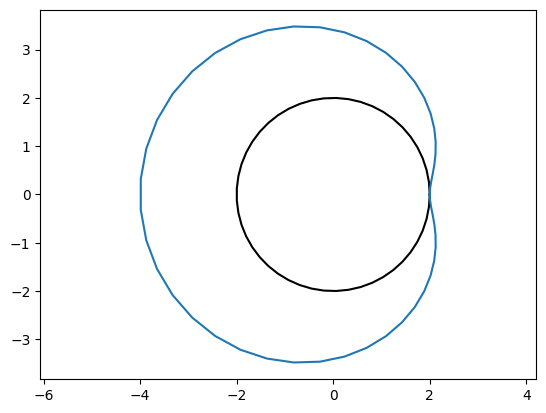

In [24]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2*np.pi)
plt.plot(2*np.cos(t), 2*np.sin(t), 'k')

t = np.linspace(0, 4*np.pi)
pq = np.array([np.cos(t-np.pi), np.sin(t-np.pi)])
op = np.array([3*np.cos(t/2), 3*np.sin(t/2)])
plt.plot(*op+pq, 'C0')

# t = np.linspace(0, 4*np.pi, 7)
# for t0 in t:
#     tt = np.linspace(0, 2*np.pi)
#     pq = np.array([np.cos(tt), np.sin(tt)])
#     op = np.array([3*np.cos(t0/2), 3*np.sin(t0/2)])
#     plt.plot(*op[:, np.newaxis]+pq, 'k--')
plt.axis('equal')

plt.savefig('img/ch-7/7-4-3-1.png', dpi=600, bbox_inches='tight')

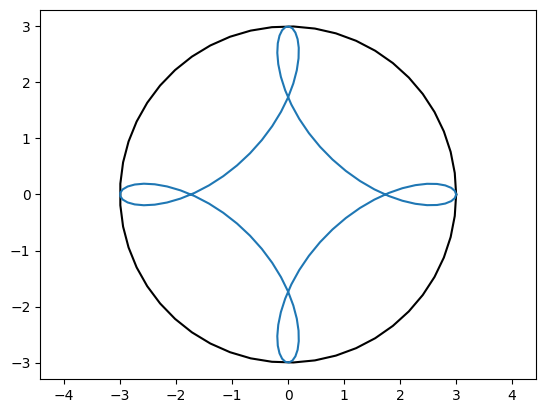

In [20]:
t = np.linspace(0, 2*np.pi)
plt.plot(3*np.cos(t), 3*np.sin(t), 'k')

t = np.linspace(0, 6*np.pi, 100)
pq = np.array([np.cos(-t), np.sin(-t)])
op = np.array([2*np.cos(t/3), 2*np.sin(t/3)])
plt.plot(*op+pq, 'C0')

plt.axis('equal')

plt.savefig('img/ch-7/7-4-3-2.png', dpi=600, bbox_inches='tight')